In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
from datetime import datetime, timedelta
from pytz import timezone
import pytz
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
import matplotlib
import scipy.signal as signal



jet= cm.get_cmap('jet', 22)


# import os
# os.environ["PROJ_LIB"] = "C:\\Users\\USUARIO\\Anaconda3\\Library\\share"
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
# from matplotlib.patches import Polygon

import matplotlib as mpl
plt.style.use('seaborn-paper')
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['font.sans-serif'] = 'Century Gothic'
mpl.rcParams['font.family'] = 'Century Gothic'
mpl.rcParams['font.weight'] = 'normal'

# Lectura de datos 

In [2]:
paths = glob.glob(r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD\Datos_CTD_CSV\*.csv")

In [3]:
len(paths)

19

## Metadatos

In [4]:
metadata = pd.read_csv(paths[0], delimiter = ",", nrows = 23,names=['Device', 'Value']) # Modeficar ruta
for i in range (0, metadata.shape[0]):
    if metadata['Device'].values[i][0:2]=='% ':
        metadata['Device'][i] = metadata['Device'][i][2:len(metadata['Device'][i])] 
    
# metadata.set_index("% Device")
metadata

,Device,Value
0,Device,CC1314009
1,File name,CC1314009_20211112_132002
2,Cast time (UTC),2021-11-12 13:20:02
3,Cast time (local),2021-11-12 08:20:02
4,Sample type,Cast
5,Cast data,Processed
6,Location source,GPS
7,Default latitude,32
8,Default altitude,0
9,Start latitude,12.6130342


## Datos

In [5]:
data = pd.read_csv(paths[0], delimiter = ",", header = 28) # Modeficar ruta
df = pd.DataFrame(data = np.c_[data['Depth (Meter)'].values,data['Temperature (Celsius)'].values,\
                               data['Salinity (Practical Salinity Scale)'].values], columns =['Depth','Temp','Sal'])
df

,Depth,Temp,Sal
0,0.149900,28.972649,36.071249
1,0.449708,28.995840,36.012342
2,0.749518,28.991557,36.053456
3,1.049320,28.991178,36.079389
4,1.349118,28.993397,36.094505
...,...,...,...
90,27.128178,28.298359,36.318839
91,27.427826,28.264690,36.334837
92,27.727467,28.228117,36.347137
93,28.027087,28.048359,36.420373


# Crear diccionario

In [6]:
%%time
Datos = {}
Datos_Dp = {}
time = []
lat = np.zeros(shape = len(paths))
lon = np.zeros(shape = len(paths))
DepthEnd = np.zeros(shape=len(paths))
for i in range (0, len(paths)):
    metadata = pd.read_csv(paths[i], delimiter = ",", nrows = 23,names=['Device', 'Value']) # Modeficar ruta
    for j in range (0, metadata.shape[0]):
        if metadata['Device'].values[j][0:2]=='% ':
            metadata['Device'][j] = metadata['Device'][j][2:len(metadata['Device'][j])]   
    # metadata.set_index("% Device")
    lat[i] = float(metadata[metadata.Device == 'Start latitude'].Value.values)
    lon[i] = float(metadata[metadata.Device == 'Start longitude'].Value.values)
    Time = metadata[metadata.Device == 'Cast time (local)'].Value.values
    time.append(Time)
    if (i < 9):
        name = 'GP0'+str(i+1)+' '+str(Time[0])
    else:
        name = 'GP'+str(i+1)+' '+str(Time[0])
#     print(name)
    data = pd.read_csv(paths[i], delimiter = ",", header = 28) # Modeficar ruta
    df = pd.DataFrame(data = np.c_[data['Depth (Meter)'].values,data['Temperature (Celsius)'].values,\
                               data['Salinity (Practical Salinity Scale)'].values], columns =['Depth','Temp','Sal'])
    DepthEnd[i] = df.Depth.values[-1]
    if (i < 9):
        name_Depth = str(round(df.Depth.values[-1],4))+'_GP0'+str(i+1)
    else:
        name_Depth = str(round(df.Depth.values[-1],4))+'_GP'+str(i+1)
    Datos.setdefault(name,df)
    Datos_Dp.setdefault(name_Depth,df)
Puntos = [i for i in Datos.keys()]            # Obtener las variables del espectro 
Puntos
Puntos_Dp = sorted(Datos_Dp.keys())
Puntos_Dp

Wall time: 680 ms


['13.8845_GP13',
 '16.8027_GP19',
 '18.1649_GP16',
 '18.7154_GP12',
 '20.1008_GP04',
 '20.5336_GP02',
 '26.2313_GP05',
 '28.3878_GP01',
 '30.9768_GP15',
 '35.9707_GP17',
 '37.0111_GP06',
 '46.0829_GP18',
 '52.2348_GP03',
 '61.2445_GP07',
 '63.288_GP08',
 '79.2037_GP11',
 '80.3929_GP09',
 '81.3317_GP10',
 '82.0602_GP14']

# Gráficas de perfiles

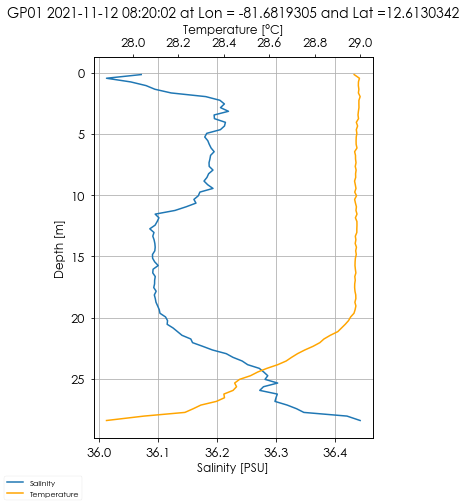

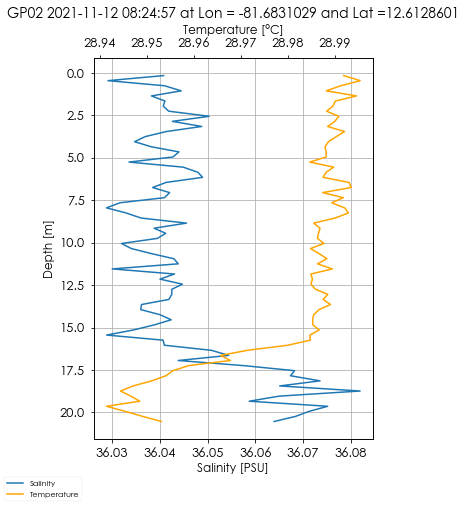

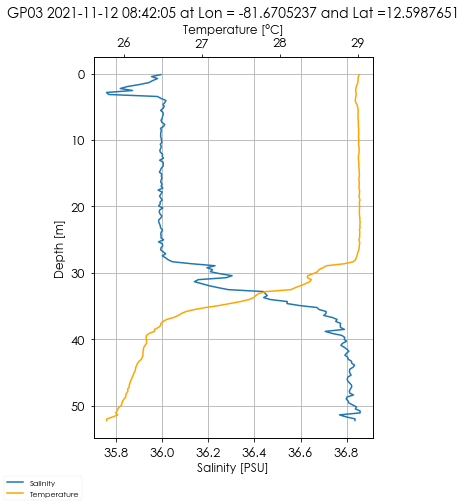

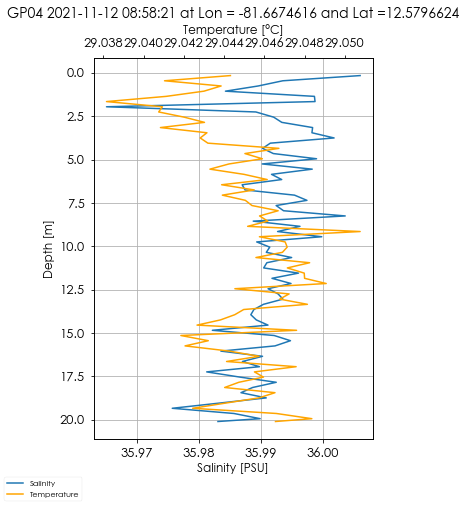

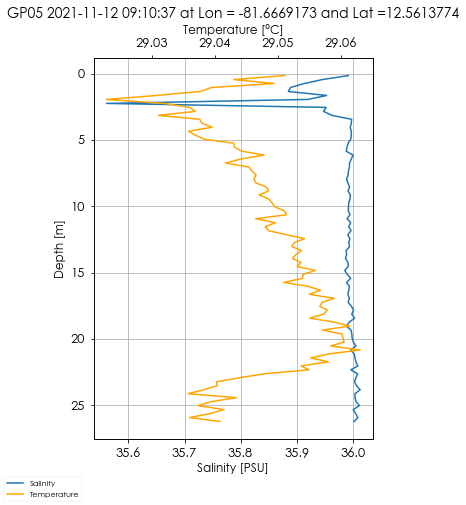

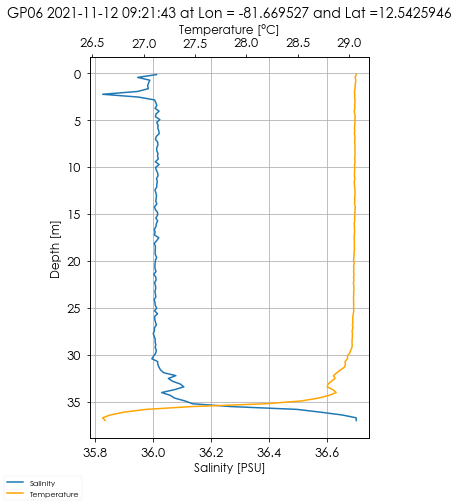

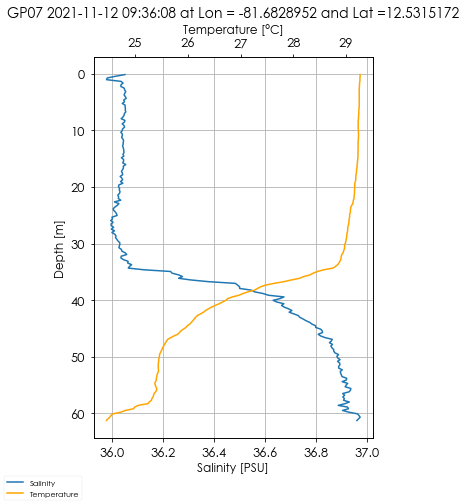

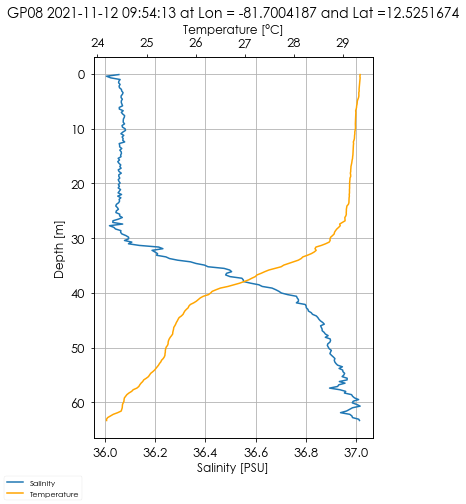

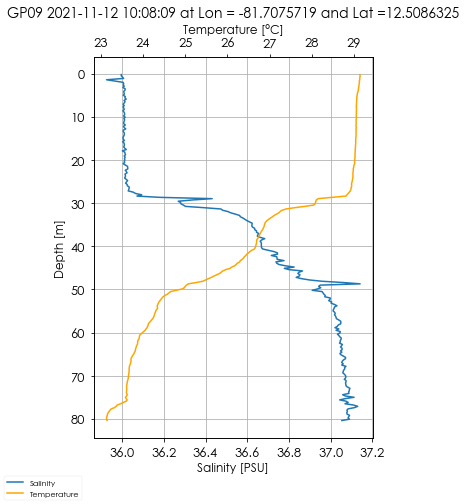

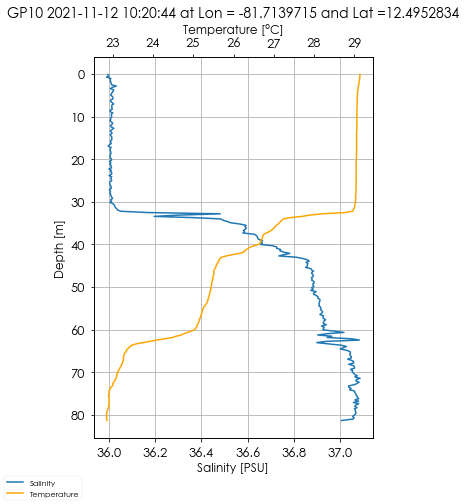

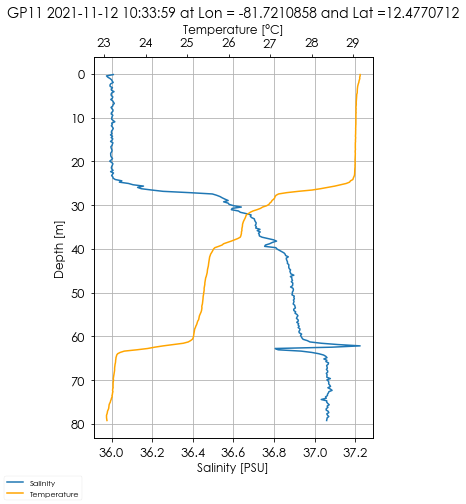

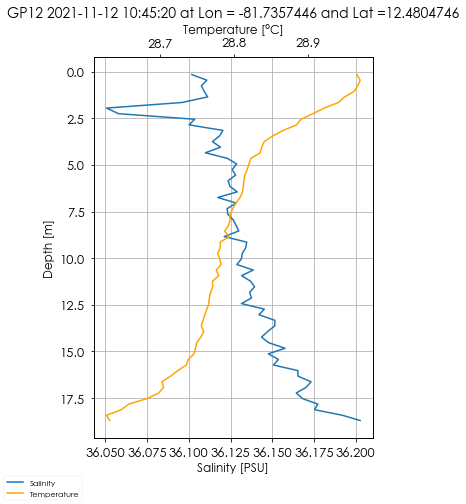

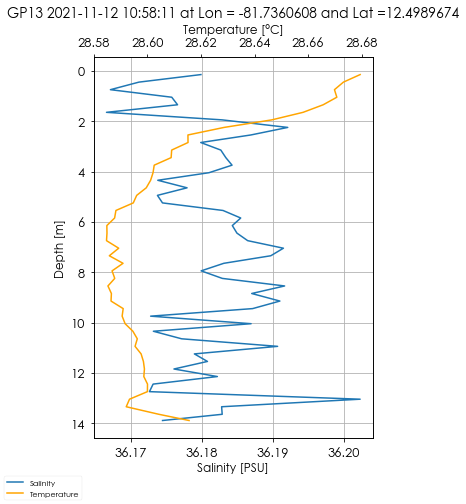

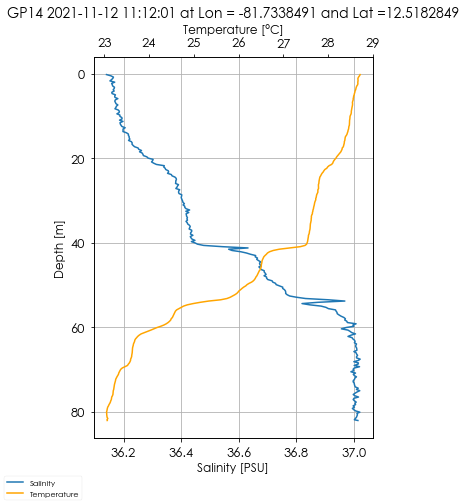

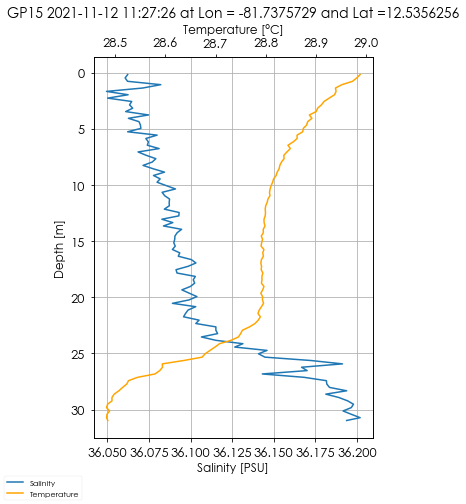

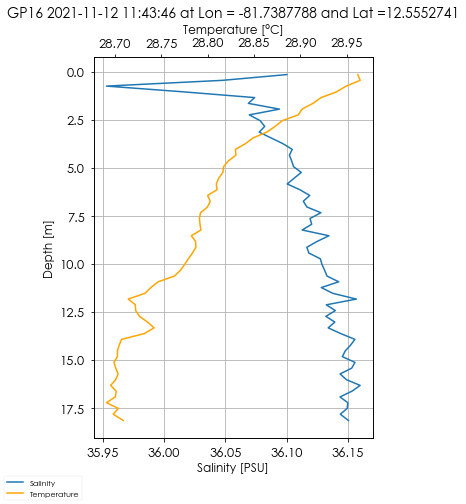

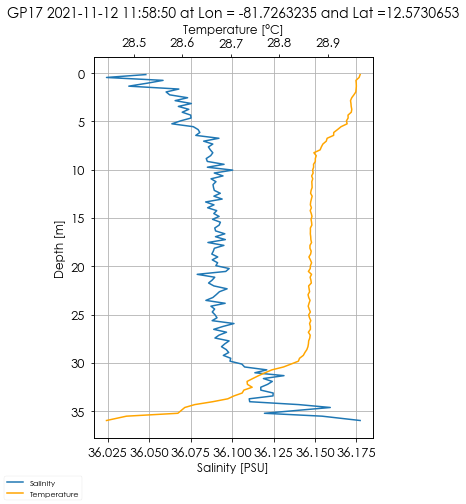

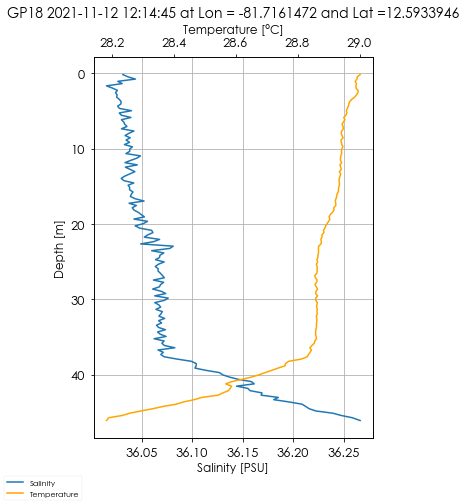

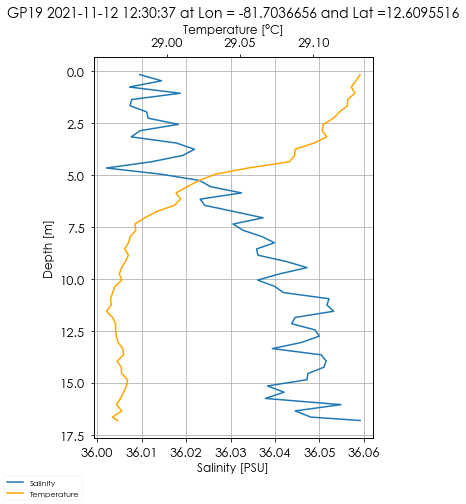

In [7]:
for i in range (0, len(paths)):
    fig, ax = plt.subplots(figsize=(5,7))
    p1 = ax.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,lw=1.5,alpha=1,ls ='-', label = 'Salinity')
    ax.set_ylabel('Depth [m]',size=12)
    ax.set_xlabel('Salinity [PSU]',size=12)
    ax.xaxis.tick_top()
    ax.invert_yaxis()

    ax.grid()
    ax2 = ax.twiny()
    p2 = ax2.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,lw=1.5,alpha=1,ls ='-',color = 'orange', label = 'Temperature')
    ax2.set_ylabel('Depth [m]',size=12)
    ax2.set_xlabel('Temperature [°C]',size=12)

    fig.legend(loc=3)
    # plt.legend([p1,p2],loc=3)
    ax.set_title(Puntos[i]+' at Lon = '+ str(lon[i])+' and Lat ='+ str(lat[i]), size=14)

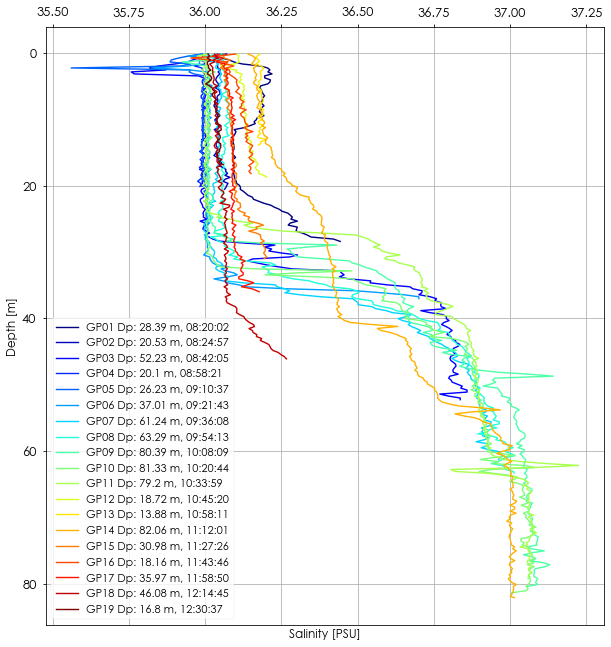

In [8]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Salinity [PSU]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=11)

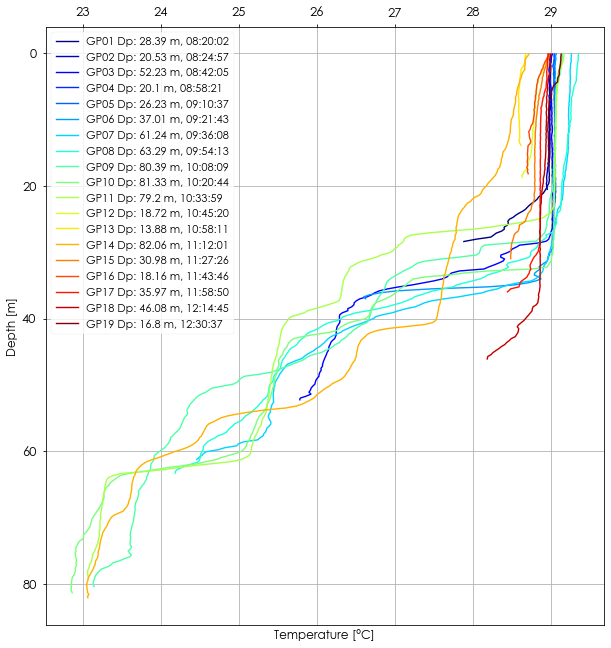

In [9]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Temperature [°C]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=11)

In [26]:
time_str = [str(time[i][0]) for i in range(0, len(paths))]
time_data = np.array([datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in time_str])
df_depth = pd.DataFrame(data = np.c_[time_data,DepthEnd,lat,lon], columns=['time','Depth','lat','lon'])
df_sort = df_depth.sort_values('Depth')
# df_depth.sort_values('time')

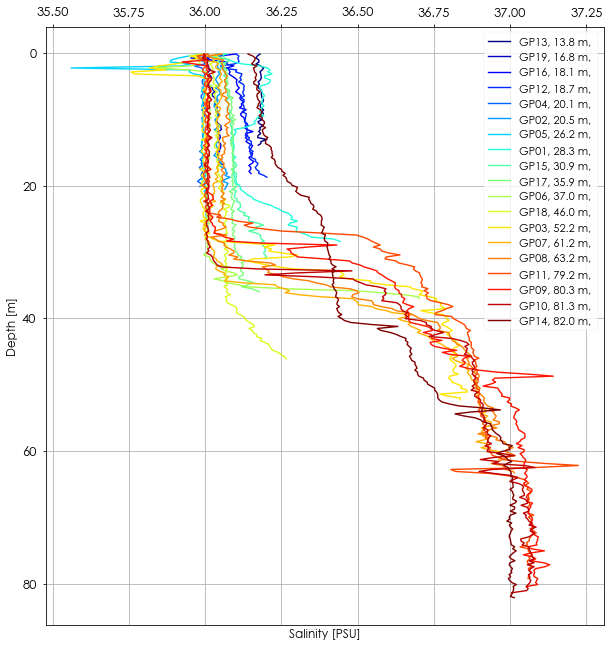

In [27]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos_Dp[Puntos_Dp[i]].Sal.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Salinity [PSU]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=11)

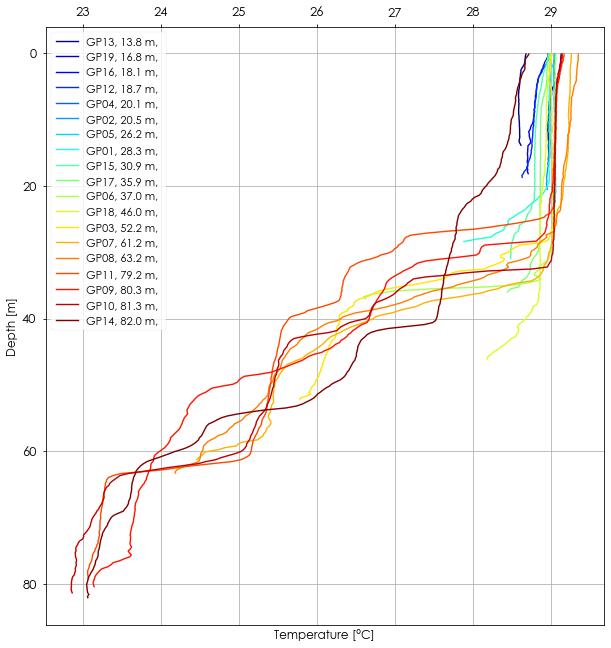

In [28]:
jet= cm.get_cmap('jet', len(paths))
# color_line = viridis.colors[x_1_0]
cNorm=mpl.colors.Normalize(vmin = 0, vmax= len(paths))
scalarMap = cm.ScalarMappable(norm = cNorm, cmap =jet)
fig, ax = plt.subplots(figsize=(10,11))
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax.plot(Datos_Dp[Puntos_Dp[i]].Temp.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax.set_ylabel('Depth [m]',size=12)
ax.set_xlabel('Temperature [°C]',size=12)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.grid()
_= ax.legend(fontsize=11)

# Mapa

In [29]:
## ----------------Lecutra de la batimetría 50m------------------
#-------------------------------------
pi, nan = np.pi, np.nan
delta = 0.00044999999999998                                        # Tamaño de la grilla 
x = np.array ([-81.756419305207 + i*delta for i in range(324)]) # Menor longitud, Numero de divisiones revisar archivo ASCI (output ARCGIS)
y = np.array ([12.460924618377+ i*delta for i in range (407)])        # Menor Latitud,  Numero de divisiones revisar archivo ASCI (output ARCGIS)
z = np.flipud(np.genfromtxt(r'E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/SIMU_NOSTAT/Caso7/M_50m/idw_50m.txt',skip_header = 6))
z[z == -9999] = nan # Z donde es tierra
# suavizar batimetria y recortar bordes
# -------------------------------------
kernel = np.ones((1,1))/1.
z_smooth = signal.convolve2d(z, kernel, "same")
z_smooth = np.ma.masked_array(z, mask=np.isnan(z_smooth))
x_new = x.copy()
y_new = y.copy()
z_new = z_smooth.copy()
#----------------Lectura linea de costa-----------------
lc = np.genfromtxt(r'E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/SIMU_NOSTAT/Caso7/M_Grande/lineaCosta_full.txt',\
                   missing_values = 'nan',delimiter = ' ')
lc[:,0] = lc[:,0]  

In [36]:
#---------------Ubicacion de puntos en mapa------------------------------------
Lat_map = np.zeros(shape = len(paths))
Lon_map = np.zeros(shape = len(paths))
for i in range (0, len(paths)):
    indlat = np.where((df_sort.lat.values[i]<(y+0.00025)) & (df_sort.lat.values[i]>(y-0.00025)))[0][0]
    indlon = np.where((df_sort.lon.values[i]<(x+0.00025)) & (df_sort.lon.values[i]>(x-0.00025)))[0][0]
#     print(indlat)
    Lat_map[i] = y[indlat]
    Lon_map[i] = x[indlon]

df_sort['latMap'] = Lat_map 
df_sort['lonMap'] = Lon_map
df_sort['errorlat'] = abs(df_sort.latMap.values - df_sort.lat.values)*(111100)
df_sort['errorlon'] = abs(df_sort.lonMap.values - df_sort.lon.values)*(111100) 
df_crono = df_sort.sort_values('time')

In [37]:
df_crono

,time,Depth,lat,lon,latMap,lonMap,errorlat,errorlon
0,2021-11-12 08:20:02,28.3878,12.613,-81.6819,12.613025,-81.682169,1.06452,26.5313
1,2021-11-12 08:24:57,20.5336,12.6129,-81.6831,12.613025,-81.683069,18.278,3.73238
2,2021-11-12 08:42:05,52.2348,12.5988,-81.6705,12.598625,-81.670469,15.6075,6.04326
3,2021-11-12 08:58:21,20.1008,12.5797,-81.6675,12.579725,-81.667319,6.91246,15.809
4,2021-11-12 09:10:37,26.2313,12.5614,-81.6669,12.561275,-81.666869,11.419,5.33222
5,2021-11-12 09:21:43,37.0111,12.5426,-81.6695,12.542375,-81.669569,24.44,4.70011
6,2021-11-12 09:36:08,61.2445,12.5315,-81.6829,12.531575,-81.683069,6.37918,19.3431
7,2021-11-12 09:54:13,63.288,12.5252,-81.7004,12.525275,-81.700619,11.912,22.2872
8,2021-11-12 10:08:09,80.3929,12.5086,-81.7076,12.508625,-81.707819,0.875648,27.4867
9,2021-11-12 10:20:44,81.3317,12.4953,-81.714,12.495125,-81.714119,17.6406,16.4212


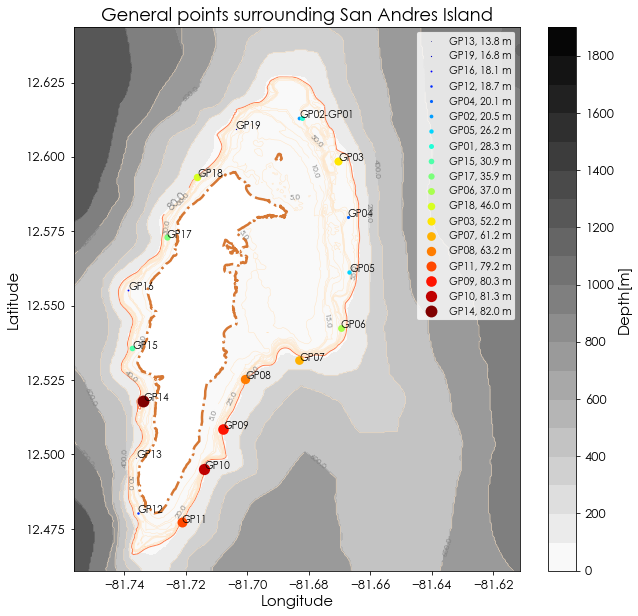

In [32]:
# crear figura
# ------------
fig, ax = plt.subplots(figsize = (10,10))
# colormap = reverse_colourmap(cm.RdYlBu)
# colormap = reverse_colourmap(cm.YlGnBu)
# colormap = cm.Blues
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='gray')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
    shp_scatter[i] = i+1
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,ms=shp_scatter[i]/1.6, ls = ' ', \
               label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
#------------ Anotar los nombres de los puntos generales--------------------
    if (i != 5) & (i!= 7):
        ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 10)
    elif i == 5:
         ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:])+'-'+\
                 str(Puntos_Dp[7][-4:]) , fontsize = 10)
    else: 
        pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth[m]',size=15)
ax.set_title('General points surrounding San Andres Island',size = 18)
_= ax.legend(fontsize = 10)
ax.grid(False)

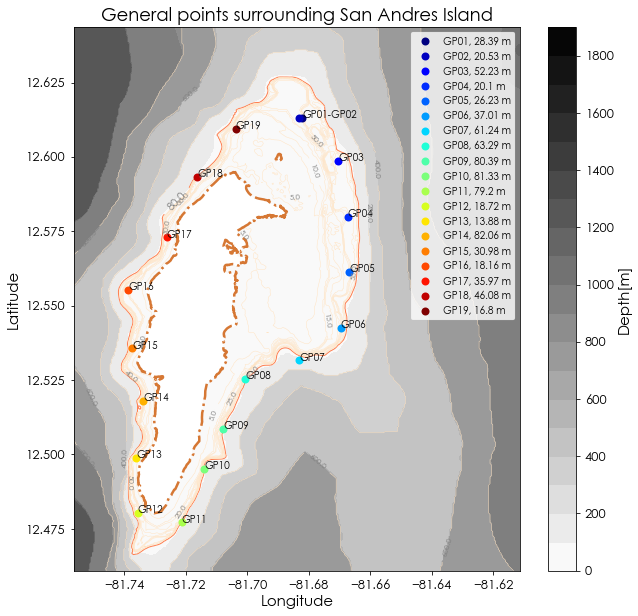

In [45]:
# crear figura
# ------------
fig, ax = plt.subplots(figsize = (10,10))
# colormap = reverse_colourmap(cm.RdYlBu)
# colormap = reverse_colourmap(cm.YlGnBu)
# colormap = cm.Blues
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='gray')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
#     shp_scatter[i] = df_sort.Depth.values[i]/5
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_crono.lonMap.values[i],df_crono.latMap.values[i],marker="o",color = colorVal,ms=8, ls = ' ', \
               label = str(Puntos[i][0:4])+', '+ str(round(DepthEnd[i],2))+' m')
#------------ Anotar los nombres de los puntos generales--------------------
    if (i != 0) & (i!= 1):
        ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4]), fontsize = 10)
    elif i == 0:
         ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4])+'-'+\
                 str(Puntos[1][0:4]) , fontsize = 10)
    else: 
        pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth[m]',size=15)
ax.set_title('General points surrounding San Andres Island',size = 18)
_= ax.legend(fontsize = 10)
ax.grid(False)

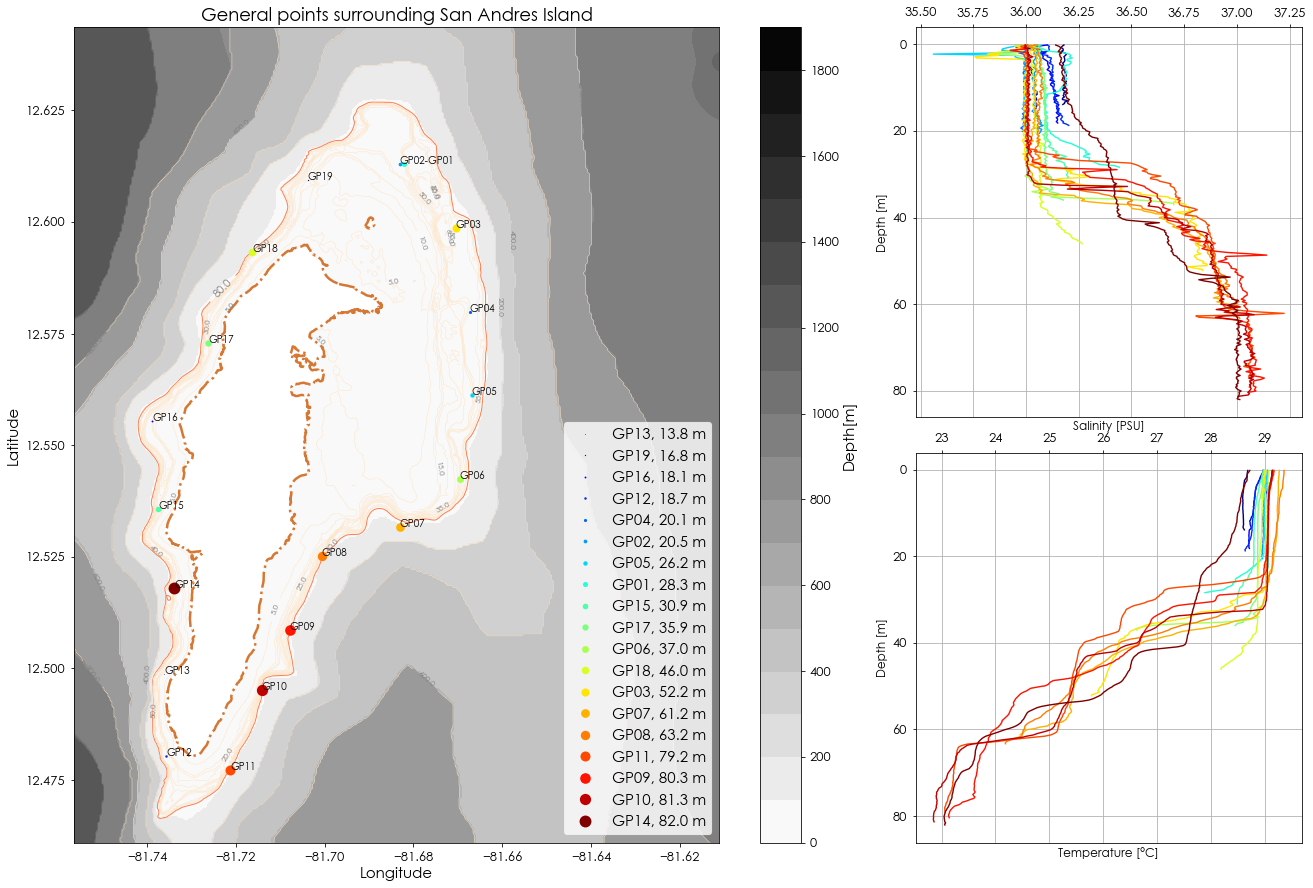

In [17]:
# crear figura
# ------------
plt.close()
fig = plt.figure (figsize = (22,15))
ax = plt.subplot2grid((4,6),(0,0),colspan = 4,rowspan=4)
# ax = plt.subplot(2,3, (1,3))
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='gray')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
    shp_scatter[i] = i+1
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,ms=shp_scatter[i]/1.6, ls = ' ', \
               label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
#------------ Anotar los nombres de los puntos generales--------------------
    if (i != 5) & (i!= 7):
        ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:]), fontsize = 10)
    elif i == 5:
         ax.text(df_sort.lonMap.values[i],df_sort.latMap.values[i],str(Puntos_Dp[i][-4:])+'-'+\
                 str(Puntos_Dp[7][-4:]) , fontsize = 10)
    else: 
        pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth[m]',size=15)
ax.set_title('General points surrounding San Andres Island',size = 18)
_= ax.legend(loc= 4,fontsize = 15)
ax.grid(False)

ax1 = plt.subplot2grid((4,6),(0,4),rowspan=2,colspan=2)
# ax1 = plt.subplot(222)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax1.plot(Datos_Dp[Puntos_Dp[i]].Sal.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax1.set_ylabel('Depth [m]',size=12)
ax1.set_xlabel('Salinity [PSU]',size=12)
ax1.xaxis.tick_top()
ax1.invert_yaxis()
ax1.grid()
# ax1.set_figheight(5)
# ax1.set_figwidth(5)
# _= ax1.legend(fontsize=11)

ax2 = plt.subplot2grid((4,6),(2,4),rowspan=2,colspan=2)
# ax2 = plt.subplot(224)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax2.plot(Datos_Dp[Puntos_Dp[i]].Temp.values,Datos_Dp[Puntos_Dp[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m, '+str(df_sort.index[i])[11:19])
ax2.set_ylabel('Depth [m]',size=12)
ax2.set_xlabel('Temperature [°C]',size=12)
ax2.xaxis.tick_top()
ax2.invert_yaxis()
ax2.grid()
# _= ax2.legend(fontsize=11)
ruta = r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD"  
plt.savefig(ruta+'\General_Profailes_SAI.png',dpi=800,bbox_inches='tight',pad_inches=0)

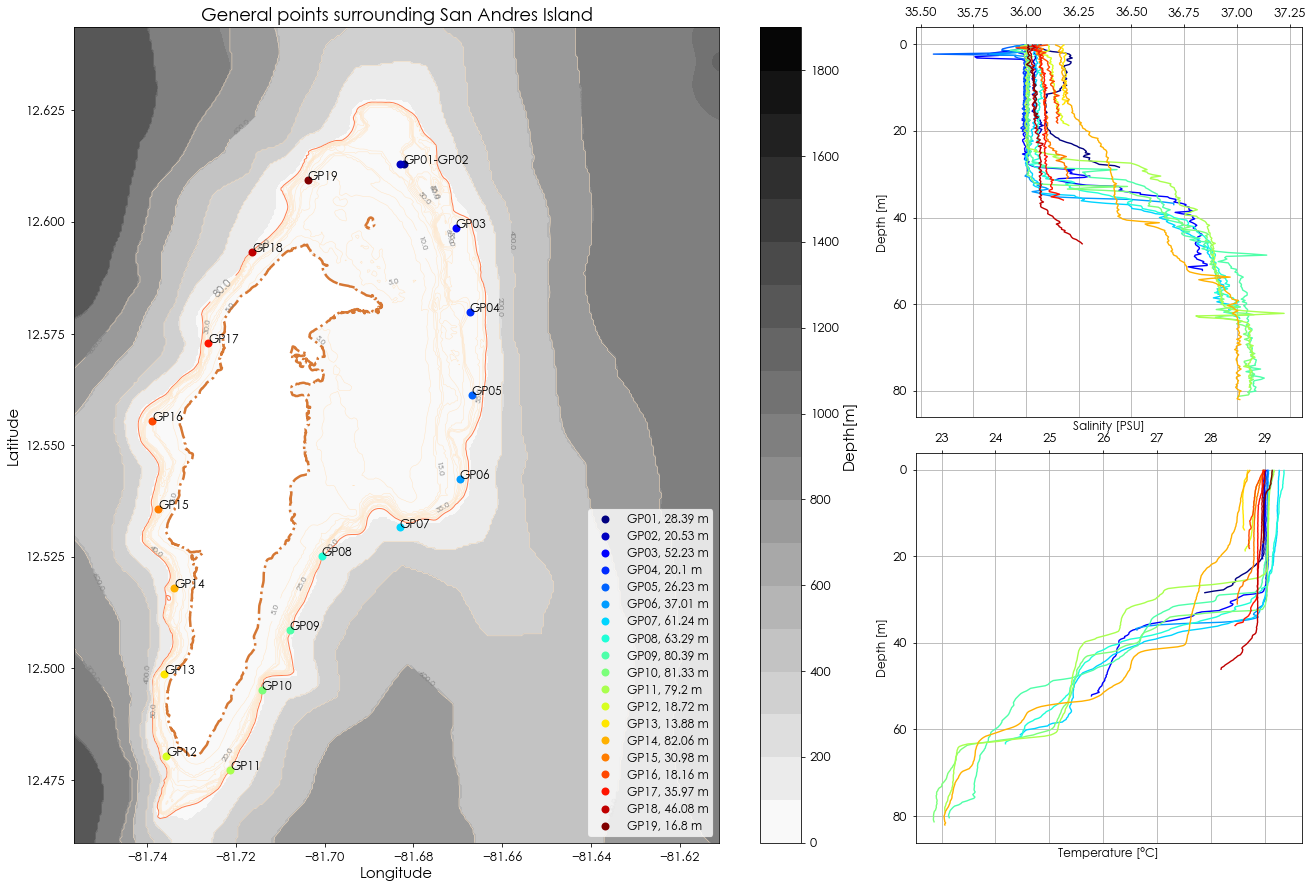

In [49]:
# crear figura
# ------------
plt.close()
fig = plt.figure (figsize = (22,15))
ax = plt.subplot2grid((4,6),(0,0),colspan = 4,rowspan=4)
# ax = plt.subplot(2,3, (1,3))
colormap = cm.binary
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,2000,100),cmap = colormap)
cb=plt.colorbar(pc)
 
a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,100,80)),colors="coral",\
               linewidths=1)
b = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,1000,200)),colors="bisque",\
               linewidths=0.5)
c = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,65,5)),colors="bisque",\
               linewidths=0.5)

aa = plt.clabel(a, fontsize=11, inline=1,fmt='%2.1f',colors='gray')
bb = plt.clabel(b, fontsize=8, inline=1,fmt='%2.1f',colors='gray')
cc = plt.clabel(c, fontsize=8, inline=1,fmt='%2.1f',colors='gray')

shp_scatter = np.zeros(shape = len (paths)) 
# for i in range (0, len(paths)):
#     shp_scatter[i] = i+1
#     colorVal = scalarMap.to_rgba(i)
#     ax.scatter(df_sort.lonMap.values[i],df_sort.latMap.values[i],marker="o",color = colorVal,s=shp_scatter[i]*5, \
#                label = str(Puntos_Dp[i][-4:])+', '+str(Puntos_Dp[i][0:4])+' m')
for i in range (0, len(paths)):
#     shp_scatter[i] = df_sort.Depth.values[i]/5
    colorVal = scalarMap.to_rgba(i)
    ax.plot(df_crono.lonMap.values[i],df_crono.latMap.values[i],marker="o",color = colorVal,ms=8, ls = ' ', \
               label = str(Puntos[i][0:4])+', '+ str(round(DepthEnd[i],2))+' m')
#------------ Anotar los nombres de los puntos generales--------------------
    if (i != 0) & (i!= 1):
        ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4]), fontsize = 12)
    elif i == 0:
         ax.text(df_crono.lonMap.values[i],df_crono.latMap.values[i],str(Puntos[i][0:4])+'-'+\
                 str(Puntos[1][0:4]) , fontsize = 12)
    else: 
        pass
            
ax.set_xlabel ('Longitude',size=15)
ax.set_ylabel ('Latitude',size=15)
ax.plot(lc[:,0], lc[:,1], "-.",c='chocolate', lw=2.5, alpha = 0.9)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth[m]',size=15)
ax.set_title('General points surrounding San Andres Island',size = 18)
_= ax.legend(loc = 4, fontsize = 12)
ax.grid(False)

ax1 = plt.subplot2grid((4,6),(0,4),rowspan=2,colspan=2)
# ax1 = plt.subplot(222)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax1.plot(Datos[Puntos[i]].Sal.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax1.set_ylabel('Depth [m]',size=12)
ax1.set_xlabel('Salinity [PSU]',size=12)
ax1.xaxis.tick_top()
ax1.invert_yaxis()
ax1.grid()
# _= ax1.legend(fontsize=11)

ax2 = plt.subplot2grid((4,6),(2,4),rowspan=2,colspan=2)
# ax2 = plt.subplot(224)
for i in range (0, len(paths)):
    colorVal = scalarMap.to_rgba(i)
    p1 = ax2.plot(Datos[Puntos[i]].Temp.values,Datos[Puntos[i]].Depth.values,color=colorVal\
                 ,ls ='-', label = str(Puntos[i][0:4])+' Dp: '+ str(round(DepthEnd[i],2))+' m, '+str(time[i][0])[11:19])
ax2.set_ylabel('Depth [m]',size=12)
ax2.set_xlabel('Temperature [°C]',size=12)
ax2.xaxis.tick_top()
ax2.invert_yaxis()
ax2.grid()
# _= ax2.legend(fontsize=11)
ruta = r"E:\Documentos\DATOS_SAI_TODOS\DATOS_SAI_4_15_nov_2021\CTD"  
plt.savefig(ruta+'\General_Profailes_SAI_2.png',dpi=800,bbox_inches='tight',pad_inches=0)